# Titanic Competition

Develop predictions about which passengers on the titanic survived.

Target variable: Survived

In [607]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [608]:
# import and name data sets
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Clean and EDA

In [609]:
#NA in Columns of test
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since more than half of the data is missing in cabin, cabin will be deleted. There is no way to fill column data from other columns. Will attempt to fill age column with the mean of the column as a whole. 

In [610]:
#Drop Embarked NA
train["Embarked"] = train["Embarked"].dropna()
test["Embarked"] = test["Embarked"].dropna()

In [611]:
#Drop Cabin

train = train.drop(columns = "Cabin", axis = 1)


<AxesSubplot:>

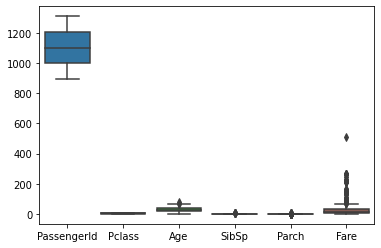

In [612]:
#Look at outliers 
import seaborn as sns
sns.boxplot(data = test)

<AxesSubplot:>

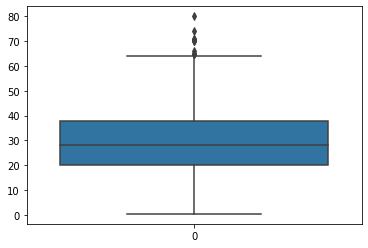

In [613]:
#Outliers in Age
sns.boxplot(data = train["Age"])

There are a LOT of outliers, I will delete these as they may be affecting the model. 

In [614]:
# Delete Outliers in Age
train = train[ (train['Age']<=50)]

<AxesSubplot:>

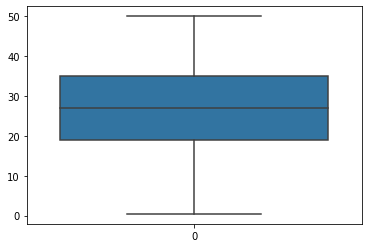

In [615]:
# Confirm Outliers in Age
sns.boxplot(data = train["Age"])

<AxesSubplot:>

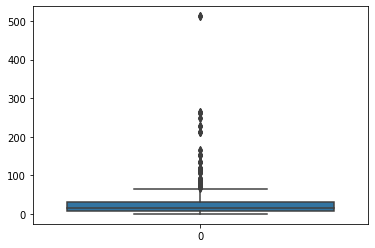

In [616]:
#Outliers in Age
sns.boxplot(data = train["Fare"])

In [617]:
# Delete Outliers in Age
train = train[ (train["Fare"]<=200)]

In [618]:
train.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    448.486572
Survived         0.401264
Pclass           2.339652
Age             26.777520
SibSp            0.530806
Parch            0.429700
Fare            27.025763
dtype: float64

# Dummy Variables and Fill Missing Values

In [619]:
#Create dummies for Embarked 
train['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1,2], inplace=True)

test['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1,2], inplace=True)

In [620]:
# Create dummies for Sex
train['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
test['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

In [621]:
#use mean and median to fill missing values in Sex


from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(train[[ 'Embarked', "Fare","Age"]])
  
#Filling missing data with median
train[['Embarked', "Fare", 'Age']] = si.transform(train[["Embarked", "Fare","Age"]])


test[['Embarked', "Fare","Age"]] = si.transform(test[["Embarked", "Fare","Age"]])

# Feature Selection

All variables will be used in model. Will rearrange columns for assignment to model  

In [622]:
#Look at variables columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [623]:
#delete variables like PassengerId and Ticket and rearrange for model building
train = train[['Pclass', 'Sex', 'Age', 'SibSp','Pclass',
       'Parch', 'Fare', "Embarked","Survived"]]

test = test[['Pclass', 'Sex', 'Age', 'SibSp',"Pclass",'Parch', 'Fare', "Embarked"]]

# Model Building

In [624]:
# Assign X variables for train and testing
from sklearn.linear_model import LogisticRegression

X_train = train.iloc[:,:-1]
X_test = test
y_train =train["Survived"]

X_train

,Pclass,Sex,Age,SibSp,Pclass,Parch,Fare,Embarked
0,3,0,22.0,1,3,0,7.2500,0.0
1,1,1,38.0,1,1,0,71.2833,1.0
2,3,1,26.0,0,3,0,7.9250,0.0
3,1,1,35.0,1,1,0,53.1000,0.0
4,3,0,35.0,0,3,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
885,3,1,39.0,0,3,5,29.1250,2.0
886,2,0,27.0,0,2,0,13.0000,0.0
887,1,1,19.0,0,1,0,30.0000,0.0
889,1,0,26.0,0,1,0,30.0000,1.0


In [625]:
# Fit model and create predictions
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [626]:
# Create list of predictions for Submission
test1 = pd.read_csv("../input/titanic/test.csv")
submission = test1[["PassengerId"]]
submission["Survived"] = predictions
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [627]:
submission.to_csv("submission8.csv", index = None)
pd.read_csv("submission8.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Since you cannot check your accuracy score or do a confusion matrix, the accuracy score of the predictions according to Kaggle is 76.55%